In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('C:\\Users\\ACER\\OneDrive\\Desktop\\PythonDesk\\CaseStudy\\Exercise Data Files')

import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
online_rt = pd.read_csv('Online_Retail.csv', encoding = 'unicode_escape')

In [3]:
online_rt.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom


In [21]:
##Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK
top_ten_cntry = online_rt[online_rt.Country != 'United Kingdom'].groupby(by = 'Country').sum('Quantity').sort_values('Quantity', ascending=False).head(10)

<Figure size 1000x500 with 0 Axes>

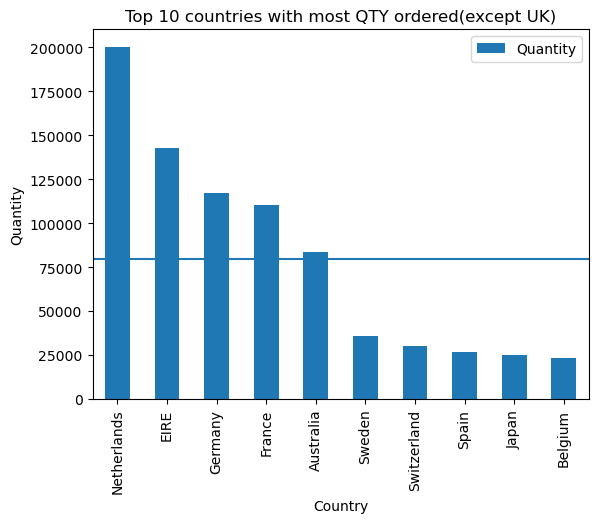

In [43]:
plt.figure(figsize=(10,5))
top_ten_cntry[['Quantity']].plot(kind='bar')
plt.title('Top 10 countries with most QTY ordered(except UK)')
plt.ylabel('Quantity')
plt.axhline(top_ten_cntry.Quantity.mean())
plt.show()

<Axes: xlabel='Country', ylabel='Quantity'>

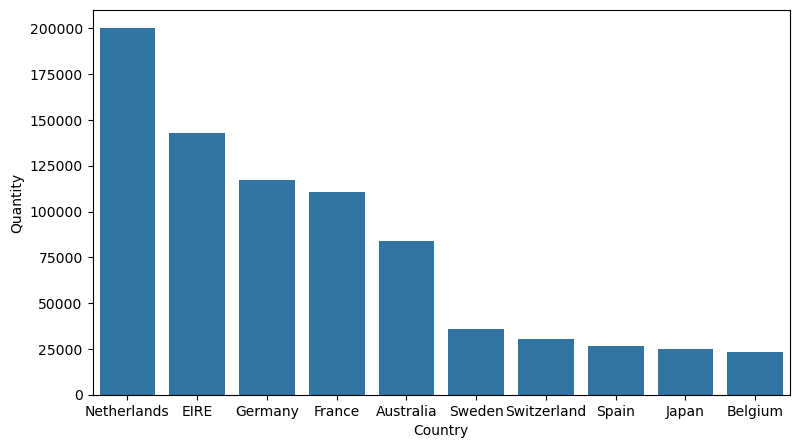

In [46]:
##another way
Q78=online_rt.groupby('Country')[['Quantity']].sum().sort_values('Quantity',ascending=False).iloc[1:11]
plt.figure(figsize=(9,5))
sns.barplot(x=Q78.index,y='Quantity',data=Q78)

In [38]:
top_10_country = online_rt.groupby('Country')[['Quantity']].sum().sort_values('Quantity',ascending=False).iloc[1:11]

In [42]:
online_rt[online_rt.Country != 'United Kingdom'].groupby(by = 'Country').sum('Quantity').sort_values('Quantity', ascending=False).head(10)[['Quantity']]

,Quantity
Country,
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824
Japan,25218


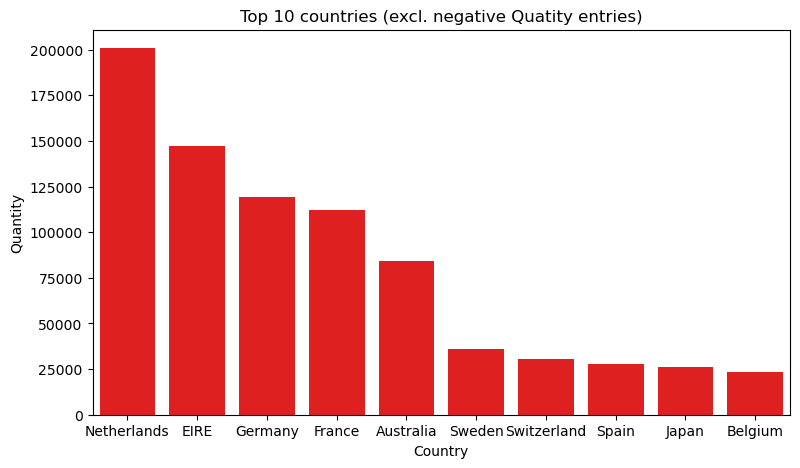

In [70]:
##Exclude negative Quatity entries
top_ten = online_rt[(online_rt.Country != 'United Kingdom') & (online_rt.Quantity > 0)].groupby(by = 'Country').sum('Quantity').sort_values('Quantity', ascending=False).head(10)
plt.figure(figsize=(9,5))
sns.barplot(x=top_ten.index,y='Quantity',data=top_ten, color='red')
plt.title('Top 10 countries (excl. negative Quatity entries)')
plt.show()

In [ ]:
##Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
##Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately

In [77]:
online_rt.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00


In [76]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice

In [100]:
top3 = online_rt.groupby('Country')[['Revenue']].sum().sort_values('Revenue', ascending=False).head(3).index.to_list()

In [128]:
data_top3 = online_rt.query('Country in @top3').groupby(['Country','CustomerID']).agg({'Quantity':'sum','UnitPrice':'mean'}).reset_index()

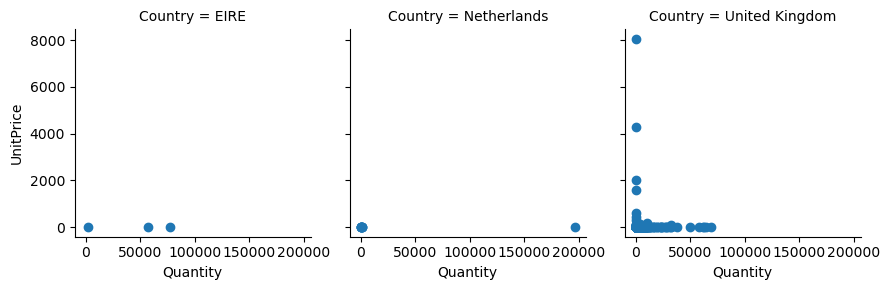

In [151]:
c=sns.FacetGrid(data_top3,col='Country')
c.map(plt.scatter,"Quantity","UnitPrice")

In [150]:
online_rt.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


<Axes: xlabel='Quantity', ylabel='UnitPrice'>

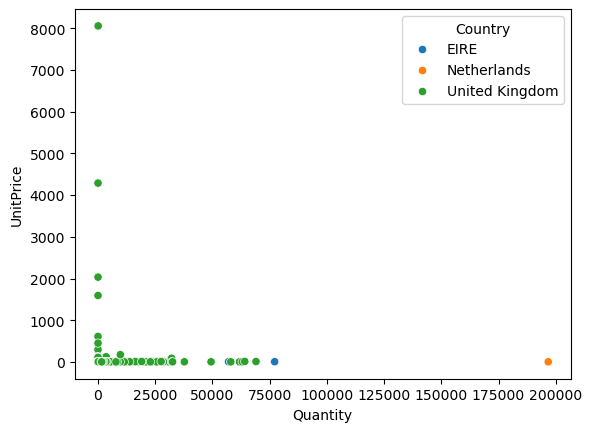

In [129]:
sns.scatterplot(x = data_top3.Quantity, y = data_top3.UnitPrice, hue = data_top3.Country)

In [141]:
b=online_rt.query('Country in @top3').groupby(['Country','CustomerID']).agg({'Quantity':'sum','UnitPrice':'mean'}).reset_index()
b[b.Country == 'United Kingdom']

,Country,CustomerID,Quantity,UnitPrice
12,United Kingdom,12346.0,0,1.040000
13,United Kingdom,12747.0,1275,4.367864
14,United Kingdom,12748.0,24210,3.256269
15,United Kingdom,12749.0,1422,5.071429
16,United Kingdom,12820.0,722,1.904746
...,...,...,...,...
3957,United Kingdom,18280.0,45,4.765000
3958,United Kingdom,18281.0,54,5.622857
3959,United Kingdom,18282.0,98,4.821538
3960,United Kingdom,18283.0,1397,1.614987


In [106]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France,16.60


In [125]:
online_rt.query('Country in @top3').groupby(['Country', 'CustomerID']).agg({'Quantity':'sum','UnitPrice':'mean'}).reset_index()

,Country,CustomerID,Quantity,UnitPrice
0,EIRE,14016.0,2124,4.003889
1,EIRE,14156.0,57025,4.608655
2,EIRE,14911.0,77180,5.261843
3,Netherlands,12759.0,902,3.215474
4,Netherlands,12775.0,853,3.844328
...,...,...,...,...
3957,United Kingdom,18280.0,45,4.765000
3958,United Kingdom,18281.0,54,5.622857
3959,United Kingdom,18282.0,98,4.821538
3960,United Kingdom,18283.0,1397,1.614987
